In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import pickle as pkl
import gcmc

In [3]:
save_folder = "/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915"
file_names = glob.glob(os.path.join(save_folder, "weight_rank_task_*_seed_*.pkl"))
display(file_names)

['/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_2AF_seed_3.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_4.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_2AF_seed_31.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_13.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_8.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_32.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_85.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_29.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_CXT_seed_90.pkl',
 '/mnt/home/h

In [5]:
parsed_result_capacity = []
capacity_attrs = ["capacity", "dimension", "radius", "center_alignment",
                "axes_alignment", "center_axes_alignment"]
common_cols = ["lr", "weight_rank", "delta_W", "sign_sim", "rep_sim", "kernel_alignment", "seed", "task"]

for file_name in file_names:
    sample_file = pkl.load(open(file_name, "rb"))
    for i in sample_file:
        res = {key: i[key] for key in common_cols}
        capacity0 = res | {"status": "Untrained", "accuracy": i["acc_0"], "loss": i["loss_0"]}
        if i["capacity_0"] is None:
            for capacity_attr in capacity_attrs:
                capacity0[capacity_attr] = None
        else:
            for capacity_attr in capacity_attrs:
                if isinstance(i["capacity_0"], gcmc.utils.ManifoldAnalysisResults):
                    capacity0[capacity_attr] = getattr(i["capacity_0"], capacity_attr).item()
                else:
                    this_df_0 = i["capacity_0"].copy().reset_index().query("shuffle == False")
                    capacity0[capacity_attr] = this_df_0[capacity_attr].mean()


        capacityt = res | {"status": "Trained", "accuracy": i["acc_t"], "loss": i["loss_t"]}
        if i["capacity_t"] is None:
            for capacity_attr in capacity_attrs:
                capacityt[capacity_attr] = None
        else:
            for capacity_attr in capacity_attrs:
                if isinstance(i["capacity_t"], gcmc.utils.ManifoldAnalysisResults):
                    capacityt[capacity_attr] = getattr(i["capacity_t"], capacity_attr).item()
                else:
                    this_df = i["capacity_t"].copy().reset_index().query("shuffle == False")
                    capacityt[capacity_attr] = this_df[capacity_attr].mean()
        if capacity0["capacity"] is not None and capacityt["capacity"] is not None:
            delta_capacity = capacityt["capacity"] - capacity0["capacity"]
        else:
            delta_capacity = None
        if capacityt["radius"] is not None and capacityt["radius"] > 100:
            print(capacityt)
        if capacity0["radius"] is not None and capacity0["radius"] > 100:
            print(capacity0)
            display(i["capacity_0"])
        parsed_result_capacity.append(capacity0 | {"delta_capacity": delta_capacity})
        parsed_result_capacity.append(capacityt | {"delta_capacity": delta_capacity})
result_df_cap = pd.DataFrame(parsed_result_capacity)
result_df_cap["kernel_alignment"] = [i.item() for i in result_df_cap["kernel_alignment"]]

In [68]:
sample_file = pkl.load(open("/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240911_1/weight_rank_task_2AF_seed_3.pkl", "rb"))

In [71]:
sample_file[0]["capacity_0"]

capacity  dimension        radius  \
name shuffle i_P seed                                      
1    False   0   3     0.040084  16.714080  38308.295851   
     True    0   3     0.043027  17.429523  37150.389786   
     False   1   3     0.039481  18.011264  37276.589736   
     True    1   3     0.043027  17.429523  37150.389786   

                       capacity_geometric_approx  \
name shuffle i_P seed                              
1    False   0   3                      0.059830   
     True    0   3                      0.057374   
     False   1   3                      0.055521   
     True    1   3                      0.057374   

                       capacity_geometric_approx_corrected  center_alignment  \
name shuffle i_P seed                                                          
1    False   0   3                                0.024329               1.0   
     True    0   3                                0.024932               1.0   
     False   1   3                                0.023364               1.0   
     True    1   3                                0.024932               1.0   

                       axes_alignment  center_axes_alignment  correction  \
name shuffle i_P seed                                                      
1    False   0   3           1.000000               1.023778   24.389118   
     True    0   3           0.998133               1.142191   22.679977   
     False   1   3           0.999999               1.073495   24.788730   
     True    1   3           0.998133               1.142191   22.679977   

                       solution_volume  ...  \
name shuffle i_P seed                   ...   
1    False   0   3                 0.0  ...   
     True    0   3                 0.0  ...   
     False   1   3                 0.0  ...   
     True    1   3                 0.0  ...   

                       center_alignment_scaled_normalized  \
name shuffle i_P seed                                       
1    False   0   3                           4.351845e+08   
     True    0   3                           4.342134e+08   
     False   1   3                           4.288675e+08   
     True    1   3                           4.342134e+08   

                       axes_alignment_scaled_normalized  \
name shuffle i_P seed                                     
1    False   0   3                         4.351839e+08   
     True    0   3                         4.342133e+08   
     False   1   3                         4.288672e+08   
     True    1   3                         4.342133e+08   

                       center_axes_alignment_scaled_normalized  \
name shuffle i_P seed                                            
1    False   0   3                               -8.703683e+08   
     True    0   3                               -8.684267e+08   
     False   1   3                               -8.577347e+08   
     True    1   3                               -8.684267e+08   

                       capacity_approx_scaled  center_alignment_scaled_diag  \
name shuffle i_P seed                                                         
1    False   0   3                   0.040090                  2.620434e+12   
     True    0   3                   0.043025                  2.184280e+12   
     False   1   3                   0.039476                  2.758993e+12   
     True    1   3                   0.043025                  2.184280e+12   

                       axes_alignment_scaled_diag  \
name shuffle i_P seed                               
1    False   0   3                   5.722715e+09   
     True    0   3                   5.736838e+09   
     False   1   3                   5.748506e+09   
     True    1   3                   5.736838e+09   

                       center_axes_alignment_scaled_diag  \
name shuffle i_P seed                                      
1    False   0   3                         -9.604915e+09   
     True    0   3                 

In [171]:
pkl.dump(sample_file[0]["X_tot0"], open("weight_rank_1_radius_explosion.pkl", "wb"))

In [172]:
result_df_cap = result_df_cap.query("seed != 30 | seed != 52")

In [6]:
display(result_df_cap)

,lr,weight_rank,delta_W,sign_sim,rep_sim,kernel_alignment,seed,task,status,accuracy,loss,capacity,dimension,radius,center_alignment,axes_alignment,center_axes_alignment,delta_capacity
0,0.003,1,1.117890,0.243948,0.713881,0.134598,3,2AF,Untrained,0.000000,0.920191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003,1,1.117890,0.243948,0.713881,0.134598,3,2AF,Trained,0.918750,0.025931,0.094028,5.300445,1.666255,0.999998,0.998545,0.357514,NaN
2,0.003,5,1.154540,0.392948,0.969542,0.102813,3,2AF,Untrained,0.471875,1.024009,0.079909,6.268936,1.329109,1.000000,0.999987,0.325171,0.016117
3,0.003,5,1.154540,0.392948,0.969542,0.102813,3,2AF,Trained,0.909375,0.026376,0.096026,9.307167,1.822364,0.999826,0.966192,0.350269,0.016117
4,0.003,10,1.222111,0.425719,0.820731,0.536618,3,2AF,Untrained,0.000000,1.068644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.003,100,1.417886,0.645729,0.890275,0.519958,43,CXT,Trained,0.893750,0.032953,0.085516,12.839570,1.612585,0.982738,0.859058,0.298853,0.014514
2396,0.003,200,1.500402,0.685896,0.991678,0.471093,43,CXT,Untrained,0.240625,1.114830,0.074222,12.695250,1.026645,0.995642,0.805238,0.865901,0.014988
2397,0.003,200,1.500402,0.685896,0.991678,0.471093,43,CXT,Trained,0.887500,0.034314,0.089210,12.978560,1.537525,0.971954,0.866874,0.100109,0.014988
2398,0.003,300,1.425518,0.647708,0.965596,0.512947,43,CXT,Untrained,0.203125,1.082404,0.073216,12.940701,1.018406,0.996665,0.854434,0.892798,0.023278


In [21]:
result_df_cap.to_csv("weight_rank_rnn.csv", index=False)

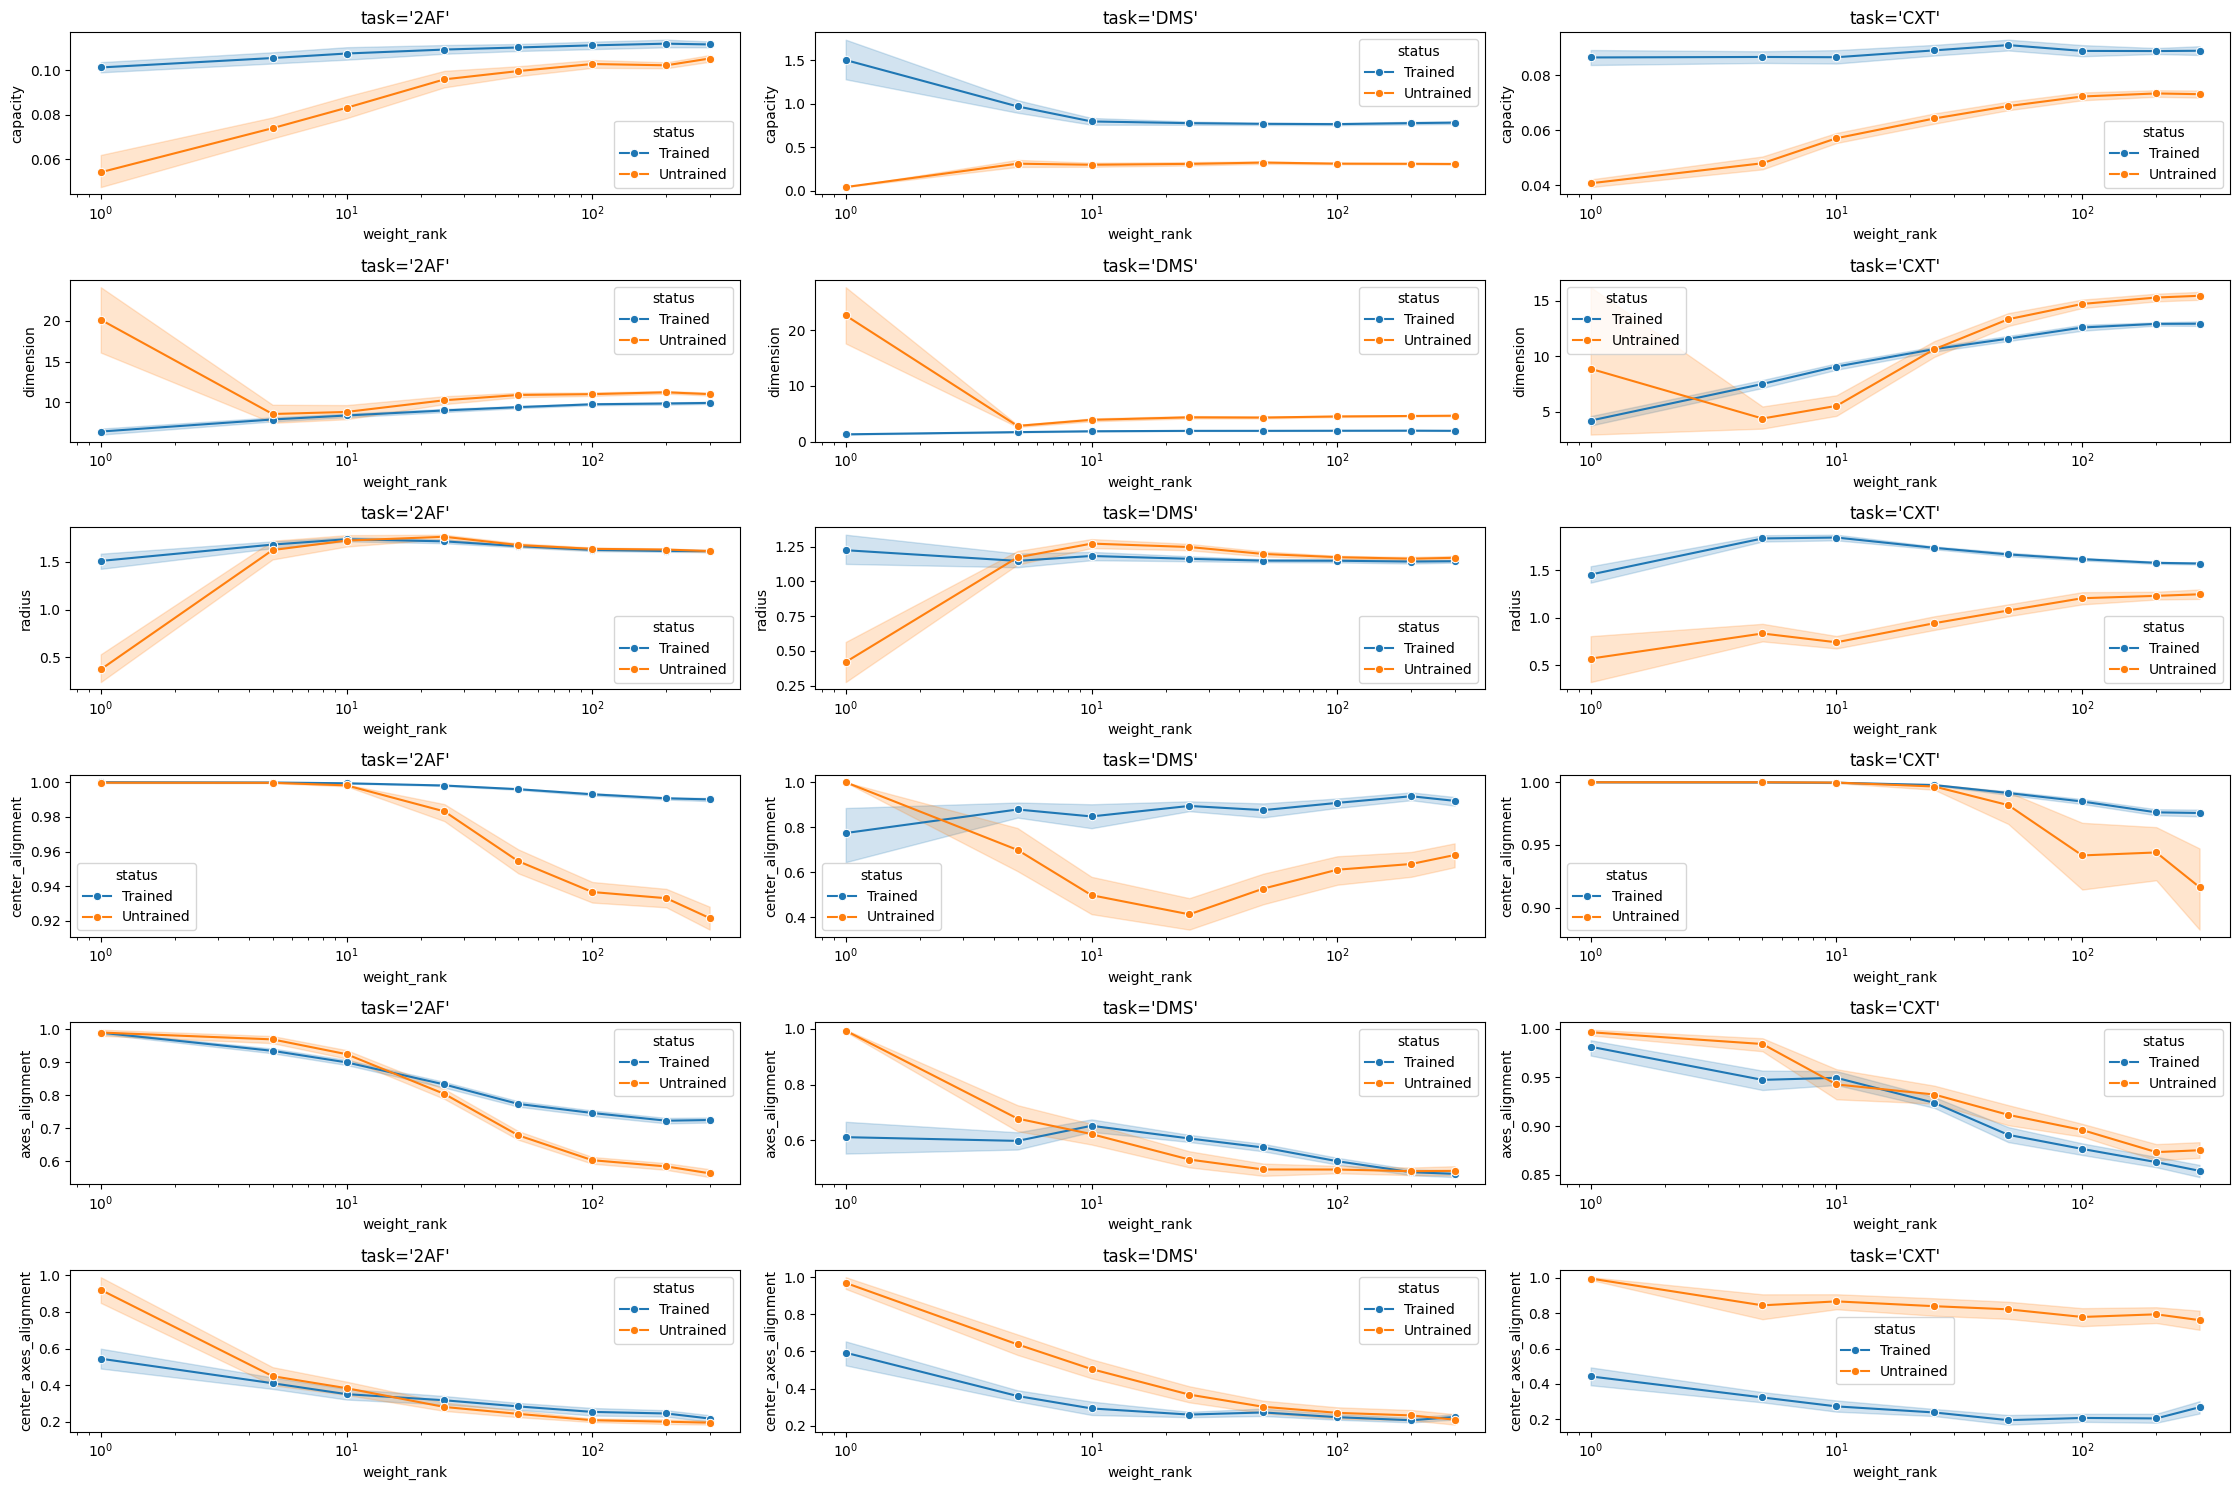

In [8]:
# capacity_cols = ["loss", "accuracy", "delta_W", "rep_sim", "kernel_alignment", "capacity", "dimension", "radius", "center_alignment", "axes_alignment", "center_axes_alignment"]
capacity_cols = ["delta_W", "rep_sim", "kernel_alignment", "delta_capacity"]
capacity_cols = ["capacity", "delta_capacity"]
capacity_cols = ["capacity", "dimension", "radius", "center_alignment", "axes_alignment", "center_axes_alignment"]
tasks = result_df_cap["task"].unique()
# tasks = ["DMS"]
fig, axs = plt.subplots(len(capacity_cols),len(tasks))
fig.set_figheight(2.5*len(axs))
fig.set_figwidth(7.5*len(tasks))
for task_idx in range(len(tasks)):
    task = tasks[task_idx]
    for col_idx in range(len(capacity_cols)):
        col, ax = capacity_cols[col_idx], axs[col_idx][task_idx]
        if col in ["capacity", "dimension", "radius", "center_alignment", "axes_alignment", "center_axes_alignment"]:
            # plot_df = result_df_cap.query(f"task == '{task}' & weight_rank >= 10")
            plot_df = result_df_cap.query(f"task == '{task}'")
            sns.lineplot(plot_df, x="weight_rank", y=col, hue="status", hue_order=["Trained", "Untrained"], ax=ax, marker="o")
            # ax.set_ylim([0, None])
        elif col in ["loss", "accuracy"]:
            plot_df = result_df_cap.query(f"task == '{task}'")
            sns.lineplot(plot_df, x="weight_rank", y=col, hue="status", hue_order=["Trained", "Untrained"], ax=ax, marker="o")
        elif col in ["delta_W", "rep_sim", "kernel_alignment"]:
            plot_df = result_df_cap.query(f"task == '{task}' & status == 'Trained'")
            sns.lineplot(plot_df, x="weight_rank", y=col,ax=ax, marker="o")
        elif col in ["delta_capacity"]:
            # plot_df = result_df_cap.query(f"task == '{task}' & status == 'Trained' & weight_rank >= 10")
            plot_df = result_df_cap.query(f"task == '{task}' & status == 'Trained'")
            sns.lineplot(plot_df, x="weight_rank", y=col,ax=ax, marker="o")
        # if "alignment" in col:
        #     ax.set_ylim([0,1.1])
        # ax.legend(bbox_to_anchor=(1, 1))
        ax.set_title(f"{task=}")
        ax.set_xscale("log")
plt.tight_layout()
plt.show()